In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def constant():
    circuit = QuantumCircuit(2)
    circuit.cx(1, 0)
    return circuit

def balanced():
    circuit = QuantumCircuit(2)
    circuit.cx(0, 1)
    return circuit

## 도이치 알고리즘
마법의 동전 실험을 해결할 수 있는 알고리즘

In [5]:
## 도이치 알고리즘
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit += constant() # 오라클 함수로 회로 구현, f(x)를 생성함수 혹은 오라클 함수라고 함
circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()


C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_24692\1724016949.py:7: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += constant() # 오라클 함수로 회로 구현


┌───┐      ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├──────░─┤ X ├─░─┤ H ├┤M├
     ├───┤┌───┐ ░ └─┬─┘ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░───■───░───────╫─
     └───┘└───┘ ░       ░       ║ 
c: 1/═══════════════════════════╩═
                                0

{'0': 1024}


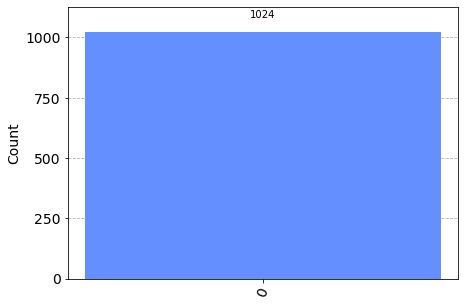

In [6]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts) # f(0) = f(1)을 확인할 수 있음

In [7]:
## 도이치 알고리즘
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit += balanced() # balanced 함수로 회로 구현(f(1) != f(0))
circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()


C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_24692\2029892383.py:7: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += balanced() # balanced 함수로 회로 구현(f(1) != f(0))


┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0

{'1': 1024}


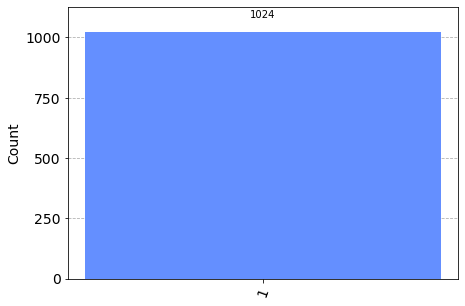

In [8]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts) # f(0) = f(1)을 확인할 수 있음